# Univariate Regression Model Review


The single variable linear model without intercepts asumes that the real distribution of the data is given by the following equation:

$$
Y = X\beta + \epsilon
$$

The least square estimate of $\beta$ and its residuals are

$$
\hat{\beta} = \frac{\sum^{N}_{i=1}x_iy_i}{\sum^{N}_{i=1}x_i^2}\\
\\
r_i = y_i - x_i\hat{\beta}
$$

where $x$ and $y$ are N-dimensional vector observations of the random variables $X$ and $Y$.

For example:


In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import uniform, norm

In [7]:
# generate random data according to the linear distribution

x = uniform(0, 2).rvs(100)
beta = 3
epsilon = norm(loc=0, scale=1).rvs(100)

y = x*beta + epsilon

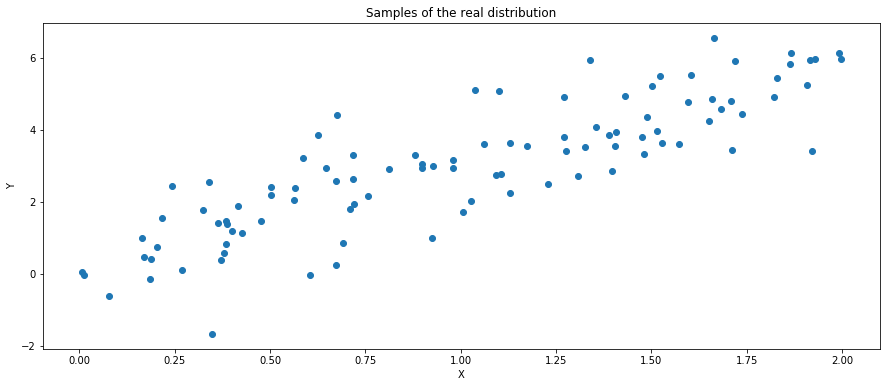

In [29]:
plt.figure(figsize=(15, 6))

plt.scatter(x, y, label="data samples")

plt.title("Samples of the real distribution")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [11]:
beta_hat = np.dot(x, y) / np.dot(x, x)
beta_hat

2.928406337723661

In [14]:
r = y - beta_hat*x

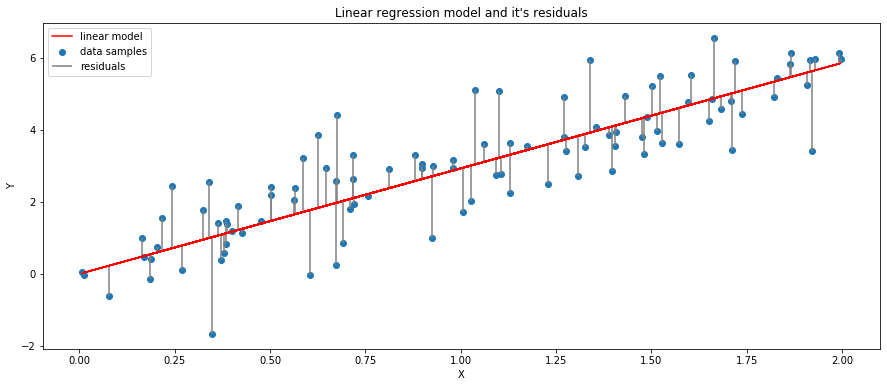

In [26]:
plt.figure(figsize=(15, 6))

plt.scatter(x, y, label="data samples")
plt.plot(x, beta_hat*x, color="red", label="linear model")

plt.vlines(x, beta_hat*x, beta_hat*x + r, color="grey", label="residuals")

plt.title("Linear regression model and it's residuals")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

# N-dimensional geometry perspective

Now, let's visualize what happens when we look at the process from the N-dimensional data space. Under this space, every point is a vector representing all the values of the data points for the same feature. That is, every $x_j$ has $N$ entries. 

For visualization purposes, we will take only 2 samples, so the data space will be 2D. 

In [79]:
# generate a single feature vector
N = 2
x = uniform(0, 2).rvs(N)

In [80]:
beta = np.array([2, 3])
y = np.dot(x, beta) + norm(loc=0, scale=1).rvs(N)

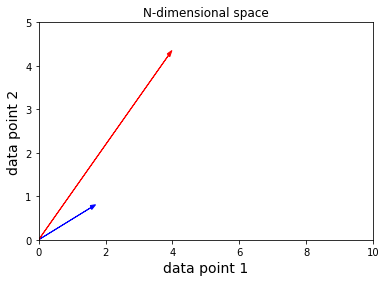

In [81]:
plt.xlim(0, 10)
plt.ylim(0, 5)

plt.title("N-dimensional space")
plt.xlabel("data point 1", fontsize="14")
plt.ylabel("data point 2", fontsize="14")

plt.arrow(0, 0, x[0], x[1], color='blue', head_width=0.1)
plt.arrow(0, 0, y[0], y[1], color="red", head_width=0.1)

plt.show()

Now let's look at the following equations:

$$
\hat{y} = x \hat{\beta} \\
\hat{\beta} = \frac{x \cdot y}{x \cdot x} \\
\hat{y} = x \frac{x \cdot y}{x \cdot x}
$$


It can be seen that $\hat{y}$ is the orthogonal proyection of $y$ over the $x$ vector.

In [100]:
y_hat = x * (np.dot(x, y) / np.dot(x, x))
r = y - y_hat

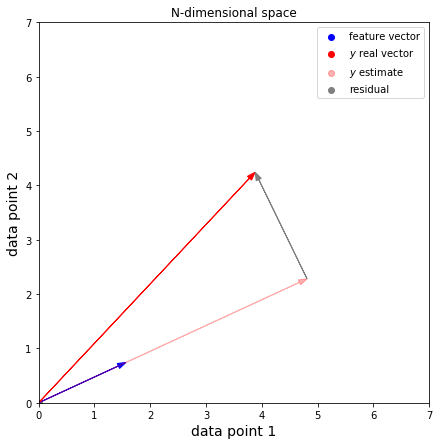

In [123]:
plt.figure(figsize=(7, 7))
plt.xlim(0, 7)
plt.ylim(0, 7)

plt.title("N-dimensional space")
plt.xlabel("data point 1", fontsize="14")
plt.ylabel("data point 2", fontsize="14")

# feature
plt.arrow(0, 0, x[0], x[1], color='blue', head_width=0.1, length_includes_head=True)
# plt.arrow(0, 0, x[0]*7, x[1]*7, color='blue', linestyle="--")

# real value
plt.arrow(0, 0, y[0], y[1], color="red", head_width=0.1, length_includes_head=True)

# estimate
plt.arrow(0, 0, y_hat[0], y_hat[1], color="red", alpha=0.3, head_width=0.1, length_includes_head=True, label="y hat")

# residual
plt.arrow(y_hat[0], y_hat[1], r[0], r[1], color="grey", head_width=0.1, length_includes_head=True, label="residual")


plt.scatter(0, 0, color='blue', label='feature vector' )
plt.scatter(0, 0, color='red', label='$y$ real vector')
plt.scatter(0, 0, color='red', alpha=0.3, label='$y$ estimate' )
plt.scatter(0, 0, color='grey', label='residual' )


plt.legend()
plt.show()

The same idea can be generalized for any number of data points, $\hat{y}$ will always be the orthogonal proyection of $y$ over the hiperplane generated by the columns of the data matrix $X$ (where the data points are the rows of the matrix).

# Multiple Regression and the correlated features problem

The generalization for multiple features can be understood in terms of the univariate linear regression. But, for doing so, we need the features to be orthogonal. Below is an example of what happens if the features are highly correlated, and how to decompose the multivariate regression in terms of univariate ones.

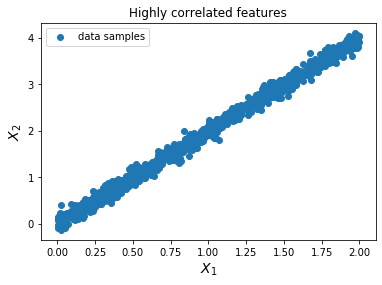

In [464]:
x1 = uniform(0, 2).rvs(1000)
x2 = x1*2 + norm(0, 0.1).rvs(1000)  # highly correlated with x1
x3 = uniform(0, 2).rvs(1000)

plt.scatter(x1, x2, label="data samples")
plt.title("Highly correlated features")
plt.legend()
plt.xlabel("$X_1$", fontsize=14)
plt.ylabel("$X_2$", fontsize=14)
plt.show()

In [465]:
X = np.stack((x1, x2, x3), axis=1)
X.shape

(1000, 3)

In [500]:
beta = np.array([2, 3, 4])
y = np.dot(X, beta) + norm(loc=0, scale=1).rvs(1000)

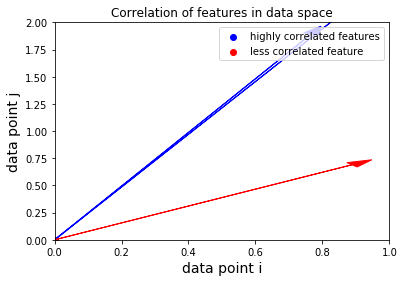

In [501]:
plt.xlim(0, 1)
plt.ylim(0, 2)

plt.title("Correlation of features in data space")
plt.xlabel("data point i", fontsize="14")
plt.ylabel("data point j", fontsize="14")

# feature 1
plt.arrow(0, 0, x1[0], x1[1], color='blue', head_width=0.05, length_includes_head=True)

# feature 2
plt.arrow(0, 0, x2[0], x2[1], color='blue', head_width=0.05, length_includes_head=True)

# feature 3
plt.arrow(0, 0, x3[0], x3[1], color='red', head_width=0.05, length_includes_head=True)

plt.scatter(0, 0, color='blue', label='highly correlated features')
plt.scatter(0, 0, color='red', label='less correlated feature')

plt.legend()
plt.show()

In the other hand, When to feature vectors are highly uncorrelated, their dot product is very close to 0. This happens when the features are orthogonal.

For example, let's introduce the feature the residual $r_1$ to the matrix data:

In [502]:
r1 = y - x1 * np.dot(x1, y) / np.dot(x1, x1)
np.dot(x1, r1)

-9.023892744153272e-13

It can be seen that $r_1$ is ortogonal with respect to $x_1$, because their dot product is near 0.

In [503]:
X = np.stack((x1, x2, x3, r1), axis=1)
np.dot(X.T, X)

array([[ 1.33213641e+03,  2.65798197e+03,  1.00023871e+03,
        -9.30810984e-13],
       [ 2.65798197e+03,  5.31355624e+03,  1.99769646e+03,
         4.10435513e+01],
       [ 1.00023871e+03,  1.99769646e+03,  1.35550022e+03,
         2.37893580e+03],
       [-9.30810984e-13,  4.10435513e+01,  2.37893580e+03,
         1.05188798e+04]])

The $X^TX$ matrix can show us if two features are ortogonal if there are entries very close to 0. In this case, the entries (1, 4) and (4, 1) are almost 0 because they are the dot product between $x_1$ and $r_1$.

In the ideal case when all the features are orthogonal, $X^TX$ will be perfectly diagonal, and the $\beta$ estimate can be written as follows:

$$
\hat{\beta} = (X^TX)^{-1} Xy
$$

$$
\hat{\beta} = \left(\begin{matrix}x_1x_1&0&...&0\\0&x_2x_2&...&0\\\vdots&\vdots&\ddots&0\\0&0&0&x_px_p\end{matrix}\right)^{-1}
Xy \\
$$
\
$$
\hat{\beta} = \left(\begin{matrix}\frac{1}{x_1x_1}&0&...&0\\0&\frac{1}{x_2x_2}&...&0\\\vdots&\vdots&\ddots&0\\0&0&0&\frac{1}{x_px_p}\end{matrix}\right) Xy
$$
\
$$
\hat{\beta}_j = \frac{x_j \cdot y}{x_j \cdot x_j}
$$

which is exactly the univariate linear regression beta estimate.

So, now we need to extract orthogonal feature vectors $z_j$ from the original feature vectors $x_j$. Here is where the gram-schmidt process enters:

In [504]:
X = np.stack((x1, x2, x3), axis=1)
X.shape

(1000, 3)

In [505]:
x0 = np.ones(1000)
z0 = x0

In [506]:
gamma01 = np.dot(z0, x1) / np.dot(z0, z0)
z1 = x1 - z0 * gamma01                              # regress x1 on z0.

gamma02 = np.dot(z0, x2) / np.dot(z0, z0)  
gamma12 = np.dot(z1, x2) / np.dot(z1, z1)
z2 = x2 - z1 * gamma12 - z0 * gamma02                # regress x2 on z0 and z1.

gamma03 = np.dot(z0, x3) / np.dot(z0, z0)  
gamma13 = np.dot(z1, x3) / np.dot(z1, z1)  
gamma23 = np.dot(z2, x3) / np.dot(z2, z2)
z3 = x3 - z2 * gamma23 - z1 * gamma13 - z0 * gamma03  # regress x3 on z0, z1, and z2.

In [507]:
Z = np.stack((z0, z1, z2, z3), axis=1)
np.dot(Z.T, Z).round()

array([[1000.,   -0.,    0.,    0.],
       [  -0.,  348.,    0.,    0.],
       [   0.,    0.,   10.,   -0.],
       [   0.,    0.,   -0.,  329.]])

In [508]:
b0 = np.dot(z0, y) / np.dot(z0, z0)
b1 = np.dot(z1, y) / np.dot(z1, z1)
b2 = np.dot(z2, y) / np.dot(z2, z2)
b3 = np.dot(z3, y) / np.dot(z3, z3)
beta_hat = np.array([b0, b1, b2, b3])

In matrix notation:

$$
X = Z\ \Gamma
$$

Using $QR$ factorization with $D$ as a diagonal matriz with $D_{jj} = ||z_j||:$

$$
X = QD^{-1}D\Gamma \\
X = QR
$$

$$
\hat{\beta} = R^{-1}Q^Ty \\
\hat{y} = QQ^Ty
$$

In [509]:
Gamma = np.array([[      1, gamma01, gamma02, gamma03],
                  [      0,       1, gamma12, gamma13],
                  [      0,       0,       1, gamma23],
                  [      0,       0,       0,       1]])

In [510]:
D = np.eye(4)
D[0, 0] = np.dot(z0, z0) ** 0.5
D[1, 1] = np.dot(z1, z1) ** 0.5
D[2, 2] = np.dot(z2, z2) ** 0.5
D[3, 3] = np.dot(z3, z3) ** 0.5
D

array([[31.6227766 ,  0.        ,  0.        ,  0.        ],
       [ 0.        , 18.64273127,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  3.18389927,  0.        ],
       [ 0.        ,  0.        ,  0.        , 18.14043708]])

In [511]:
Q = np.dot(Z, np.linalg.inv(D))
R = np.dot(D, Gamma)

In [512]:
R_inv = np.linalg.inv(R)
beta_hat = np.dot(np.dot(R_inv, Q.T), y)
y_hat = np.dot(np.dot(Q, Q.T), y)

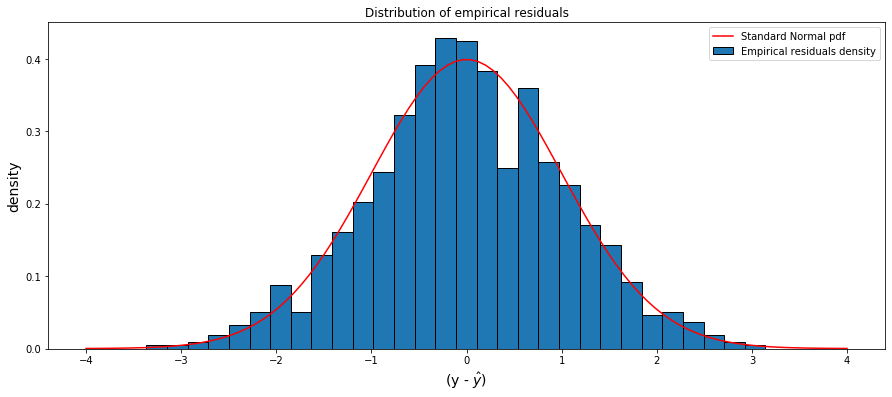

In [525]:
plt.figure(figsize=(15, 6))

t = np.linspace(-4, 4, 100)
plt.hist(y - y_hat, bins=30, edgecolor="black", density=True, label="Empirical residuals density")
plt.plot(t, norm(loc=0, scale=1).pdf(t), color="red", label="Standard Normal pdf")

plt.title("Distribution of empirical residuals")
plt.xlabel("(y - $\hat{y})$", fontsize=14)
plt.ylabel("density", fontsize=14)
plt.legend()
plt.show()

# References

[1] Hastie, T., Tibshirani, R., & Friedman, J. (2009). The elements of statistical learning: data mining, inference, and prediction. Springer Science & Business Media. Chapter 3.